<a href="https://colab.research.google.com/github/oroobyaseen/coursera.exercises/blob/gh-pages/Xgboost%2BVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install xgboost  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

import os
import seaborn as sns
from sklearn.utils import shuffle   
from keras.applications.vgg16 import VGG16

In [6]:
from tensorflow.keras.layers import BatchNormalization

In [7]:
labels = ['Meningioma', 'Glioma', 'Pituitary tumor']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
          try:
              img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)

              resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
              data.append([resized_arr, class_num])
          except Exception as e:
                print(e)
       
    return np.array(data),  np.array(labels)

In [8]:
#Now we can easily fetch our train and validation data.
train = get_data('/content/drive/MyDrive/New folder (6)/train')
val = get_data('/content/drive/MyDrive/New folder (6)/val')
test = get_data('/content/drive/MyDrive/New folder (6)/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [9]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [10]:
training_dir = '/content/drive/MyDrive/New folder (6)/train'
validation_dir = '/content/drive/MyDrive/New folder (6)/val'
test_dir = '/content/drive/MyDrive/New folder (6)/test'

In [12]:
# useful for getting number of files
image_files = glob(training_dir + '/*/*.jp*g')
valid_image_files = glob(validation_dir + '/*/*.jp*g')

In [11]:
# getting the number of classes i.e. type of  brain tumor
folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 3


In [13]:
class_names = ['Meningioma', 'Glioma', 'Pituitary tumor']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (224, 224)

In [14]:
#Display Progress
from tqdm import tqdm

Defining Classes & Loading Data

In [15]:
#Function to Load Images & Labels
def load_data():
    
    datasets = ['/content/drive/MyDrive/New folder (6)/train', '/content/drive/MyDrive/New folder (6)/val', 
                '/content/drive/MyDrive/New folder (6)/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [16]:
#Loading Data (Training & Test Dataset)
(train_images, train_labels), (val_images, val_labels) , (test_images, test_labels)= load_data()

Loading /content/drive/MyDrive/New folder (6)/train


100%|██████████| 750/750 [00:13<00:00, 55.93it/s]


Loading /content/drive/MyDrive/New folder (6)/val


100%|██████████| 93/93 [00:01<00:00, 51.59it/s]


Loading /content/drive/MyDrive/New folder (6)/test


100%|██████████| 95/95 [00:01<00:00, 59.47it/s]


Data Visualisation & Pre-Processing

In [17]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [18]:
#Label Dataset Shape
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 2456
Number of testing examples: 311
Each image is of size: (224, 224)


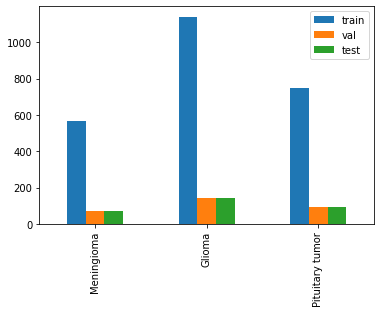

In [19]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, val_counts = np.unique(val_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,'val': val_counts , 'test': test_counts}, index=class_names).plot.bar()
plt.show()

In [20]:
#Scale the data
train_images = train_images / 255.0
test_images = test_images / 255.0
val_images = val_images / 225.0

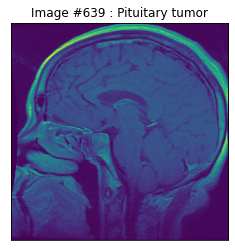

In [21]:
#Visualise the data [random image from training dataset]

def display_random_img(class_names, images, labels):
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()
    

display_random_img (class_names, train_images, train_labels)

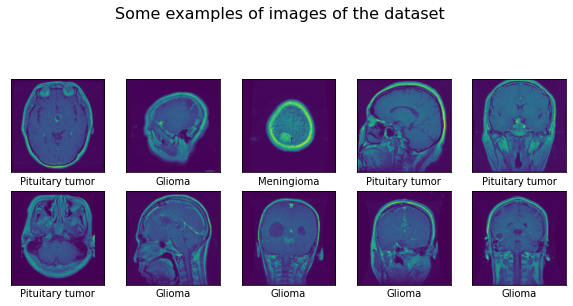

In [22]:
def display_examples(class_names, images, labels):
   
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

display_examples(class_names, train_images, train_labels)


In [23]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
le.fit(val_labels)
val_labels_encoded = le.transform(val_labels)


In [72]:
x_test, y_test = test_images, test_labels_encoded

In [73]:
x_val, y_val = val_images, val_labels_encoded

In [74]:
x_train, y_train  = train_images, train_labels_encoded

In [75]:
# Normalize pixel values to between 0 and 1
x_train, x_test , x_val= x_train / 255.0, x_test / 255.0, x_val /255.0



In [28]:
IMAGE_SIZE = 224

In [29]:
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary() #Trainable parameters will be 0

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [77]:
#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_training = features #This is our X input to RF

In [78]:
#XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_for_training, y_train) #For sklearn no one hot encoding


XGBClassifier(objective='multi:softprob')

In [80]:
#Send test data through same feature extractor process
#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction = model.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)

In [97]:
from sklearn.metrics import roc_auc_score

In [100]:
# print the model's performance
y_pred_prob = model.predict_proba(X_test_features)#[:, 1]
print('auc:', roc_auc_score(y_test, y_pred_prob, multi_class="ovr"))

auc: 0.9806528690235896


In [103]:
import sklearn

In [119]:
roc_auc = auc(y_test, y_pred_prob,  multi_class="ovo")
    #xgb.plot_importance(gbm)
    #plt.show()
plt.figure()
lw = 2
plt.plot(y_test,  y_pred_prob, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

TypeError: ignored

In [121]:
y_pred_proba = model.predict_proba(X_test_features)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob,  multi_class="ovr")
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

TypeError: ignored

In [106]:
sklearn.metrics.plot_roc_curve(y_test,  y_pred_prob, multi_class="ovr")
plt.show()

TypeError: ignored

In [ ]:
test_model = load_model('/content/model_(1).h5')

In [84]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction))

Accuracy =  0.9163987138263665


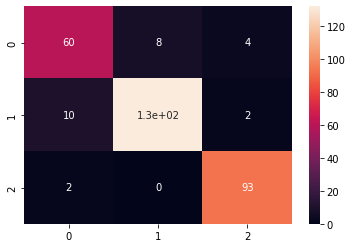

In [86]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)
#print(cm)
sns.heatmap(cm, annot=True)

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [87]:
cm_cn = np.array2string(cm)
print(cm)

[[ 60   8   4]
 [ 10 132   2]
 [  2   0  93]]


In [88]:
print('Classification Report')
# target_names = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9']
class_rep_cn = classification_report(y_test, prediction, #target_names=CLASSES
                                     )
print(class_rep_cn)

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        72
           1       0.94      0.92      0.93       144
           2       0.94      0.98      0.96        95

    accuracy                           0.92       311
   macro avg       0.91      0.91      0.91       311
weighted avg       0.92      0.92      0.92       311



In [41]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from itertools import cycle
from sklearn import metrics
from scipy import interp
import os
import shutil
from keras import backend as K
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [114]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(test_lable[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_lable.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

NameError: ignored

In [95]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model

from tensorflow.keras.models import load_model

model.save('model.json')

AttributeError: ignored

The prediction for this image is:  [2]
The actual label for this image is:  2


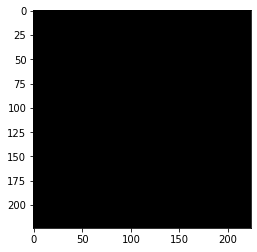

In [ ]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

